In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from collections import Counter
import re

In [89]:
df = pd.read_pickle('dataset_sentimens.pckl')
df['is_neun_euro'] = pd.np.where(df.neun_euro_context,1,0)
df['text'] = df['text'].apply(lambda x: re.sub(r"\@\w+", "", x))
df['text'] = df['text'].apply(lambda x: re.sub(r'\n', ' ', x))

<ipython-input-89-fd8b8b603cc3>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['is_neun_euro'] = pd.np.where(df.neun_euro_context,1,0)


In [90]:
cluster_variables = ['is_neun_euro', 
                    #'author_id', 
                    #'is_retweet', 
                    #'neun_euro_context', 
                    'positive', 
                    'negative', 
                    'neutral']

In [16]:
# stop_words_german = list()
# with open('stopp_wörter_deutsch.txt','r') as file:
   
#     # reading each line    
#     for line in file:
   
#         # reading each word        
#         for word in line.split(','):
   
#             # displaying the words           
#             stop_words_german.append(word.replace(' ',''))

In [6]:
X = df[cluster_variables].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X.shape


(6748, 4)

In [8]:
distortions_euclidean = []
distortions_minkowski = []
distortions_cityblock = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    distortions_euclidean.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    distortions_minkowski.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'minkowski'), axis=1)) / X.shape[0])
    distortions_cityblock.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'cityblock'), axis=1)) / X.shape[0])

    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    print(k)


In [9]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.689694790602173
2 : 1.1862382605269228
3 : 0.9706334541414341
4 : 0.735091678411581
5 : 0.6528766854642666
6 : 0.5763260418515506
7 : 0.5387030851050849
8 : 0.5010346645048767
9 : 0.46533675291826665


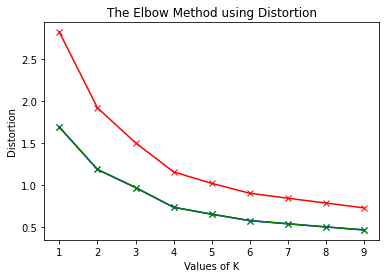

In [10]:
plt.plot(K, distortions_euclidean, 'bx-')
plt.plot(K, distortions_minkowski, 'gx-')
plt.plot(K, distortions_cityblock, 'rx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [11]:
for key, val in mapping2.items():
   print(f'{key} : {val}')

1 : 26992.000000000015
2 : 17182.291723218736
3 : 10979.762407842163
4 : 5763.471149843107
5 : 4444.289006563681
6 : 3587.5741483598295
7 : 3044.5699818814446
8 : 2523.0321948149453
9 : 2213.6422950352853


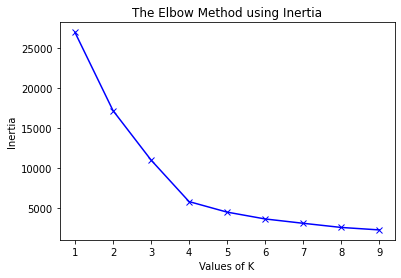

In [12]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [26]:
# df['text'] = df['text'].str.replace('\n',' ')
# corpus = df['text']
# vectorizer = TfidfVectorizer(stop_words=stop_words_german,
#                             strip_accents='unicode',
#                             max_df=0.8,
#                             min_df=100
#                             )
# X = vectorizer.fit_transform(corpus)
# vectorizer.get_feature_names()


# X = np.hstack((df[['positive', 'negative', 'neutral']].to_numpy(),X))

C:\Users\tikac\anaconda3\envs\dc\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['auayen', 'auayer', 'auayerdem', 'auayerhalb', 'daay', 'demgemaay', 'dermaayen', 'gemaay', 'groay', 'groaye', 'groayen', 'groayer', 'groayes', 'muay', 'muayt', 'wahr'] not in stop_words.
  warnings.warn(
C:\Users\tikac\anaconda3\envs\dc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['9euroticket', 'bahn', 'co', 'euro', 'fahrrad', 'rad', 'ticket', 'zug']

In [27]:
# tmp = df[['positive', 
#            'negative', 
#            'neutral'
#          ]].to_numpy()
# tmp2 = X.toarray()

# X = np.hstack((tmp,tmp2))

# X

array([[-2.06599855,  3.28259897, -0.96138668, ...,  0.41977977,
         0.        ,  0.        ],
       [-1.4868964 ,  2.03022528, -0.29550895, ...,  0.        ,
         0.72798957,  0.        ],
       [-2.18724871, -0.25623941,  3.59905171, ...,  0.36020146,
         0.30136332,  0.        ],
       ...,
       [-2.76278257, -1.73216546,  6.17389917, ...,  0.59041426,
         0.49397136,  0.        ],
       [-2.10425758, -0.13317385,  3.41354656, ...,  0.        ,
         0.        ,  0.        ],
       [-2.04638195,  3.16973639, -0.76529598, ...,  0.        ,
         0.        ,  0.        ]])

In [86]:
n=4
kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
kmeans.labels_

cluster_centers = kmeans.cluster_centers_


In [29]:
# cluster_centers[0]

array([ 2.64829013, -0.56137935, -2.0151334 ,  0.23635135,  0.0255366 ,
        0.15011066,  0.12261192,  0.32263154,  0.31281784,  0.23475848,
        0.16622765])

In [91]:
df['kmeans_label'] = kmeans.labels_
cluster_variables.append('kmeans_label')

In [92]:
df_auswertung = df[cluster_variables].groupby('kmeans_label').agg(['median', 'mean'])
df_auswertung['cluster_size'] =  np.bincount(kmeans.labels_)
df_auswertung['cluster_label'] =  range(n)
df_auswertung

is_neun_euro            positive            negative            \
                   median      mean    median      mean    median      mean   
kmeans_label                                                                  
0                       0  0.005769  2.477326  2.451029 -0.496066 -0.495223   
1                       0  0.000000 -1.801796 -1.692412  2.882205  2.843949   
2                       1  1.000000 -2.009213 -1.684969 -0.040537  0.807205   
3                       0  0.000000 -2.055211 -2.035010 -0.522277 -0.668660   

               neutral           cluster_size cluster_label  
                median      mean                             
kmeans_label                                                 
0            -1.855459 -1.879708          520             0  
1            -0.560668 -0.946064         2476             1  
2             2.615782  1.624008          402             2  
3             3.525631  3.884043         3350             3

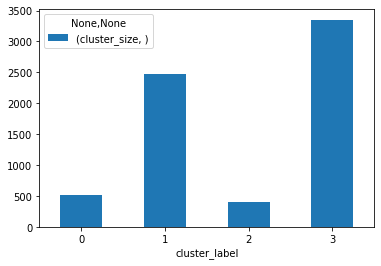

In [93]:
ax = df_auswertung.plot.bar(x='cluster_label', y=('cluster_size',''), rot=0)

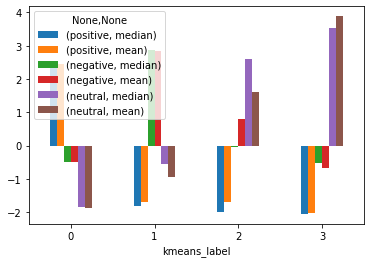

In [94]:
ax = df_auswertung[['positive', 'negative', 'neutral']].plot.bar(rot=0)

<AxesSubplot:xlabel='negative', ylabel='positive'>

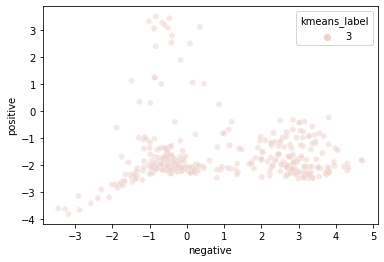

In [60]:
import seaborn as sns
sns.scatterplot(data=df[df.kmeans_label.isin([3])], x="negative", y="positive", hue="kmeans_label", alpha=0.5)

<AxesSubplot:xlabel='negative', ylabel='positive'>

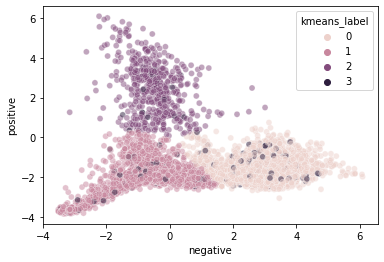

In [59]:
import seaborn as sns
sns.scatterplot(data=df, x="negative", y="positive", hue="kmeans_label", alpha=0.5)

In [82]:
df[df.kmeans_label == 1]

,index,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,...,created_at_day,neun_euro_context,text_altered,sentiments,positive,negative,neutral,created_at_week,is_neun_euro,kmeans_label
1,7,Hab mir gestern extra noch ein gebrauchtes Ra...,1518208189724045312,0,1,6,0,de,2022-04-24T12:40:14.000Z,1518199287871676417,...,2022-04-24,False,Hab mir gestern extra noch ein gebrauchtes Ra...,negative,-2.105188,2.767214,0.049121,16,0,1
8,28,Kenne das Richtung Ostsee. Da ist man als Pen...,1518243570473476103,0,0,2,0,de,2022-04-24T15:00:49.000Z,1518234450336829448,...,2022-04-24,False,Kenne das Richtung Ostsee. Da ist man als Pen...,negative,-2.106369,2.914173,-0.219098,16,0,1
14,79,"Kann durchaus sein, wenn die Anschlüsse nich...",1518363511503695876,0,0,1,0,de,2022-04-24T22:57:25.000Z,1518306274273906689,...,2022-04-24,False,"Kann durchaus sein, wenn die Anschlüsse nich...",negative,-1.558217,1.390601,1.083046,16,0,1
17,90,Dachte ma darf nur zu bestimmten Zeiten Fahrra...,1518446931000930304,0,1,0,0,de,2022-04-25T04:28:54.000Z,1518446931000930304,...,2022-04-25,False,Dachte ma darf nur zu bestimmten Zeiten Fahrra...,neutral,-2.147490,1.255697,1.974293,17,0,1
32,125,statt 12:11 stieg ich dann ~17:10 in Schopfhei...,1518540111738253315,0,1,0,0,de,2022-04-25T10:39:10.000Z,1518540094822621184,...,2022-04-25,False,statt 12:11 stieg ich dann ~17:10 in Schopfhei...,negative,-1.924044,2.275933,0.572297,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729,22076,"1. Das dauert länger, aber es passiert nun ...",1550631498625302528,0,0,0,0,de,2022-07-22T23:58:53.000Z,1550543251865624578,...,2022-07-22,False,"1. Das dauert länger, aber es passiert nun ...",negative,-1.735212,3.000468,-1.147954,29,0,1
6730,22104,"Wie Luischen schreibt ""Wir erleben live, wie ...",1550644246876667907,0,0,1,0,de,2022-07-23T00:49:32.000Z,1550481583995510786,...,2022-07-23,False,"Wie Luischen schreibt ""Wir erleben live, wie ...",negative,-2.114317,1.610287,1.596175,29,0,1
6738,22259,Ich weiss #bahn bashing ist sch*sse aber manch...,1550727316988477442,0,0,0,0,de,2022-07-23T06:19:38.000Z,1550727316988477442,...,2022-07-23,False,Ich weiss #bahn bashing ist sch*sse\naber manc...,negative,-2.173702,2.810272,0.108605,29,0,1
6741,22281,In der Praxis stellt sich das mit der vermit...,1550739825678077952,0,0,0,0,de,2022-07-23T07:09:20.000Z,1550454580911153152,...,2022-07-23,False,In der Praxis stellt sich das mit der vermit...,negative,-2.670410,2.611849,1.263368,29,0,1


In [71]:
df[(df.text.str.contains('voll', regex=False)) & (df.negative>4)]

,index,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,...,created_at_day,neun_euro_context,text_altered,sentiments,positive,negative,neutral,created_at_week,is_neun_euro,kmeans_label
1474,5248,musste grade in hannover umsteigen und der zug...,1525894298503368705,0,1,6,0,de,2022-05-15T17:42:05.000Z,1525894298503368705,...,2022-05-15,False,musste grade in hannover umsteigen und der zug...,negative,-1.832014,4.529317,-3.067464,19,0,0
3165,11011,"Andauerndes Problem, am besten die Klappsitz...",1532986143918129155,0,0,1,0,de,2022-06-04T07:22:32.000Z,1532717777865396224,...,2022-06-04,False,"Andauerndes Problem, am besten die Klappsitz...",negative,-1.316670,4.631898,-4.258342,22,0,0
3189,11074,Nicht nur nach Sylt..auch normaler RE von der...,1533099805379026948,0,0,0,0,de,2022-06-04T14:54:11.000Z,1532805108903419906,...,2022-06-04,False,Nicht nur nach Sylt..auch normaler RE von der...,negative,-1.788907,4.906959,-3.662102,22,0,0
4375,14242,"Züge sind übervoll, fallen aus, kommen mit Ve...",1537471745577336833,0,0,0,0,de,2022-06-16T16:26:43.000Z,1537471745577336833,...,2022-06-16,False,"Züge sind übervoll, fallen aus, kommen mit Ve...",negative,-1.668678,4.717016,-3.644410,24,0,0
4606,15202,"Naja, ich hab das auch schon 1x versucht: a...",1541302484324519936,0,0,2,0,de,2022-06-27T06:08:42.000Z,1541033716734124034,...,2022-06-27,False,"Naja, ich hab das auch schon 1x versucht: a...",negative,-0.837099,4.912840,-5.437482,26,0,0
4626,15234,Ich fahre mehrmals die Woche eine 1h20min str...,1541359872553394176,0,0,0,0,de,2022-06-27T09:56:45.000Z,1541033716734124034,...,2022-06-27,False,Ich fahre mehrmals die Woche eine 1h20min str...,negative,-0.778966,4.126553,-4.780017,26,0,0
4719,15493,*komm so an und geh zu meinem rad* eh übertri...,1541896696032010243,0,0,9,0,de,2022-06-28T21:29:54.000Z,1541896696032010243,...,2022-06-28,False,*komm so an und geh zu meinem rad* \neh übertr...,negative,-1.688154,4.028229,-2.757822,26,0,0
4785,15657,Für mich als Pendler zwischen Bonn und Köln is...,1542199560302379009,3,13,86,2,de,2022-06-29T17:33:22.000Z,1542199560302379009,...,2022-06-29,True,Für mich als Pendler zwischen Bonn und Köln is...,negative,-1.938246,4.309477,-2.518546,26,1,3
5009,16115,Was für ein Quatsch. Aber man liest auch ...,1542943024845553667,2,0,184,0,de,2022-07-01T18:47:38.000Z,1542937708095471625,...,2022-07-01,False,Was für ein Quatsch. Aber man liest auch ...,negative,-1.356642,4.791218,-4.355952,26,0,0
5371,17348,Zug 1 kommt einfach gar nicht und Zug zwei ist...,1544403965701406721,0,0,8,0,de,2022-07-05T19:32:53.000Z,1544403965701406721,...,2022-07-05,False,Zug 1 kommt einfach gar nicht und Zug zwei ist...,negative,-1.644302,4.511559,-3.445458,27,0,0


In [40]:
df[cluster_variables].agg(['median', 'mean'])

,is_neun_euro,positive,negative,neutral,kmeans_label
median,0.000000,-1.949831,-0.014251,2.082915,1.000000
mean,0.060018,-1.542756,0.721486,1.532972,0.829283


In [38]:
df_hashtags = pd.DataFrame()
for k in range(n):
    df_tmp = pd.DataFrame()
    df_tmp_2 = pd.DataFrame()
    df_tmp['hashtag_list'] = df[df.kmeans_label == k].text.str.findall(r'#.*?(?=\s|$)')
    df_tmp['number_hashtags'] = df_tmp['hashtag_list'].apply(lambda x: len(x))
    df_tmp = df_tmp[df_tmp.number_hashtags != 3]
    hashtags = list()
    for i, row in df_tmp.iterrows():
        hashtags += row['hashtag_list']
    hashtag_dict = Counter([s.translate(str.maketrans('', '', string.punctuation)) for s in hashtags])
    tmp_dict = {k: v for k, v in sorted(hashtag_dict.items(), key=lambda item: item[1], reverse=True)}
    df_tmp_2 = df_tmp_2.from_dict(tmp_dict, orient='index', dtype=None, columns=None).reset_index()
    df_tmp_2['cluster'] = k
    df_hashtags = pd.concat([df_hashtags,df_tmp_2])

In [40]:
hashtags

['#9EuroTicket',
 '#9EuroTicket',
 '#Fahrrad-Bashing',
 '#9EuroTicket',
 '#9EuroTicket',
 '#9EuroTicket',
 '#freiburg',
 '#9EuroTicket',
 '#Fahrrad',
 '#9EuroTickets',
 '#9EuroTicket',
 '#9EuroTicket',
 '#69EuroTicket',
 '#39EuroTicket',
 '#9EuroTicket',
 '#öpnv',
 '#9EuroTicket',
 '#halbzeit']

In [41]:
df_hashtags.groupby('cluster').head(3).reset_index(drop=True)

,index,0,cluster
0,9EuroTicket,8,0
1,NeunEuroTicket,1,0
2,PfingstenBahnFahrrad,1,0
3,9EuroTicket,58,1
4,ÖPNV,9,1
5,Fahrrad,8,1
6,9EuroTicket,32,2
7,Fahrrad,4,2
8,NeunEuroTicket,4,2
9,9EuroTicket,10,3


In [42]:
df[['positive', 'negative', 'neutral']].mean()

positive   -1.639606
negative    0.794598
neutral     1.580959
dtype: float64

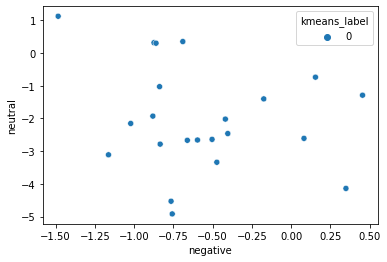

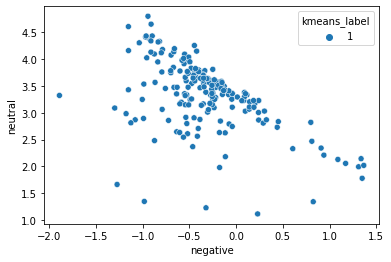

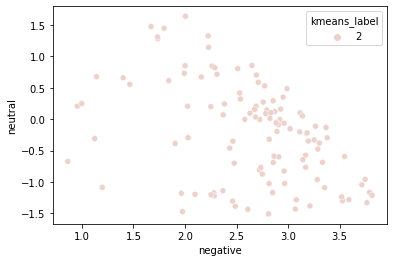

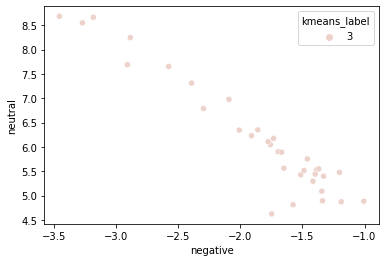

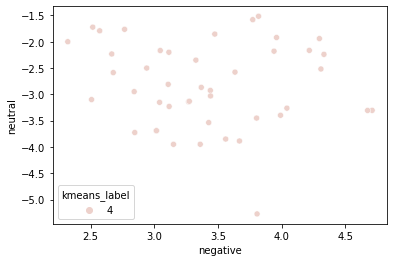

In [43]:
import seaborn as sns

for i in range(n):
    plt.figure()
    sns.scatterplot(data=df[df.kmeans_label.isin([i])], x="negative", y="neutral", hue="kmeans_label", alpha=1)

<ipython-input-85-097fd2c094cd>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


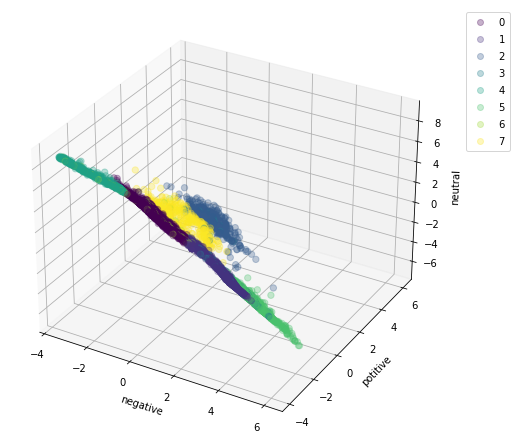

In [85]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
n = [0,1,2,3]
x = df['negative']
y = df['positive']
z = df['neutral']

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)#, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=df['kmeans_label'], marker='o', alpha=0.3)
ax.set_xlabel('negative')
ax.set_ylabel('potitive')
ax.set_zlabel('neutral')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

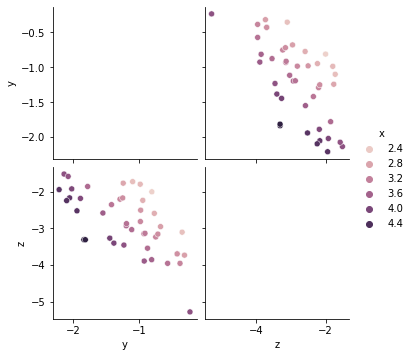

In [55]:
#Seaborn pair plot
df_3d = pd.DataFrame()
df_3d['x'] = x
df_3d['y'] = y
df_3d['z'] = z

sns.pairplot(df_3d, hue='x')